This notebook is for dynamical simulations of the model. These simulations allow for immigrating beetles and show the resulting transients. We start with the initial condition of all juvenile trees. The figures output are:

1. B and S vs. time on short and long time scales. These show the behaviour in the long term and zoom in on an individual transient outbreak. We also show the outbreak dynamics in a B vs. S plane. The level of beetle immigration here is constant.
2. The age structure of the forest over time, including before and after the beetle outbreak.
3. A plot showing when the beetle immigration is successfully in establishing a beetle population by varying the number of years of immgration and the level of immigration for a few different values of the threshold.


In [1]:
# Setup
import analysisfunctions as af
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'

# Fixed parameters
# Beetle productivity
c = 500
# Fixed values of n and phi, note that here phi is denoted as g for gamma.
n=5; p=200; s=0.99; N=50;
# Find the critical point for m and phi
ms = c*(n-1)/n
pc = (n-1)**((n-1)/n)/n*c
# And equilibrium values
meq = opt.root_scalar(lambda x: x/c - 1 + af.fhill(x,n,p),bracket=[ms,c]).root
beq = c*meq*(1-s)*s**N/(c*(1-s)*s**N+meq-meq*s**N+2*meq*(1-s)*s**N)
jeq = s**np.arange(N)*beq/c/s**N
seq = beq/meq

# Colors
c1 = '#00485C' # This is the official dark blue
c2 = '#0084A8' # Official light blue
c3 = '#986532' # Official "yellow", which is more dark brown.
cg = '0.2' # Grey
# Other options:
#'#F2E2CA' # Pale straw yellow 
# And generate an array of lightness values, from 5% to 95% lightness including the official one which is 18%.
# 20 colors, and index 16 is the initial one
# Useful link: https://www.w3schools.com/colors/colors_picker.asp
c_arr = [ '#e6f9ff','#ccf4ff','#b3eeff','#99e9ff','#80e3ff','#66deff','#4dd8ff','#33d3ff','#1acdff','#00c8ff',
          '#00b4e6','#00a0cc','#008cb3','#007899','#006480','#005066','#00485c','#003c4d','#002833','#00141a']

# 1. Simulations of invading beetles
Starting from initially all juvenile trees

In [2]:
### SIMULATION
# Set number of steps
nsteps = 500
# Set up return array
sim = np.zeros((nsteps+1,N+2))

# Set up initial conditions
sim[0,0] = 1 # All trees are juvenile to start

# Step forward
for i in np.arange(nsteps):
    sim[i+1] = af.timestep(sim[i],s,N,n,p,b_imm=50,c=c)

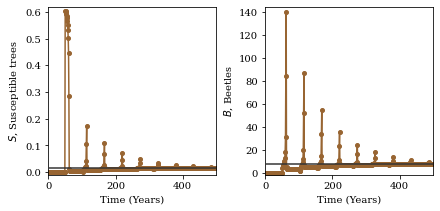

In [3]:
# Plot 
fig, axs = plt.subplots(1,2,figsize=(6,3),layout='constrained')

for i,ax in enumerate(axs):
    ax.set_box_aspect(1)
    ax.set_xlim(-1,nsteps)
    ax.set_xlabel('Time (Years)')

axs[0].axhline(seq,c=cg,zorder=100)
axs[1].axhline(beq,c=cg,zorder=100)
# Plot and label each
axs[0].set_ylabel(r'$S$, Susceptible trees')
axs[0].plot(sim[:,-2],'o-',c=c3,markersize=4)
axs[0].set_ylim(-0.01,0.62)
axs[1].set_ylabel(r'$B$, Beetles')
axs[1].plot(sim[:,-1],'o-',c=c3,markersize=4)
axs[1].set_ylim(-2,145)

fig.savefig('figures/simulation_j0_long.pdf',bbox_inches = 'tight')

In [4]:
# Find how many times larger the largest beetle population is compared to the equilibrium number
print(np.max(sim[:,-1])/beq)

19.17475072670879


In [5]:
# Determine roughly the period of the outbreaks
outbreak_args = []
outbreak_args.append(np.argmax(sim[:100,-1]))
for i in np.arange(int(nsteps/50-2)):
    outbreak_args.append(np.argmax(sim[(100+i*50):(100+(i+1)*50),-1])+100+i*50)
print(outbreak_args)
print([outbreak_args[i+1]-outbreak_args[i] for i in np.arange(len(outbreak_args)-1)])

[62, 115, 168, 221, 274, 327, 380, 433, 486]
[53, 53, 53, 53, 53, 53, 53, 53]


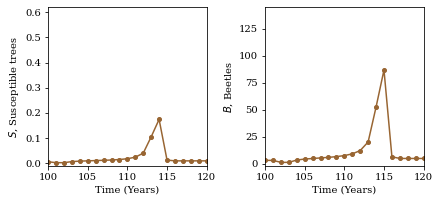

In [6]:
# Plot 
fig, axs = plt.subplots(1,2,figsize=(6,3),layout='constrained')

for i,ax in enumerate(axs):
    ax.set_box_aspect(1)
    ax.set_xlim(100,120)
    ax.set_xlabel('Time (Years)')

# Plot and label each
axs[0].set_ylabel(r'$S$, Susceptible trees')
axs[0].plot(sim[:,-2],'o-',c=c3,markersize=4)
axs[0].set_ylim(-0.01,0.62)
axs[1].set_ylabel(r'$B$, Beetles')
axs[1].plot(sim[:,-1],'o-',c=c3,markersize=4)
axs[1].set_ylim(-2,145)

fig.savefig('figures/simulation_j0_short.pdf',bbox_inches = 'tight')

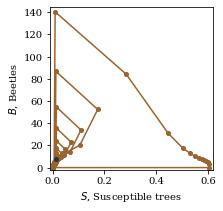

In [7]:
# Phase plane
fig, ax = plt.subplots(1,1,figsize=(3,3))
ax.set_box_aspect(1)
ax.set_xlabel(r'$S$, Susceptible trees')
ax.set_ylabel(r'$B$, Beetles')
ax.plot(sim[:,-2],sim[:,-1],'o-',c=c3,markersize=4)
ax.plot(seq,beq,'o',c=cg,zorder=100,markersize=4)
ax.set_ylim(-2,145)
ax.set_xlim(-0.01,0.62)
fig.savefig('figures/simulation_j0_phase.pdf',bbox_inches = 'tight')

# 2. Age structure change

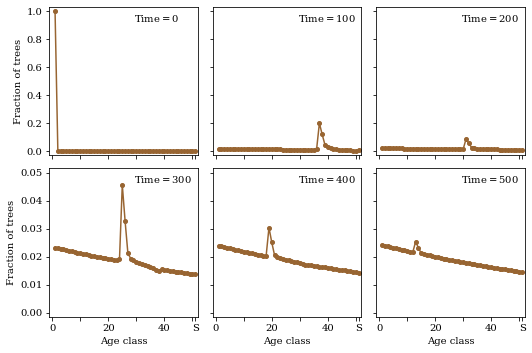

In [8]:
# Plot initial, intermediate, and final age distributions
fig, axs = plt.subplots(2,3,figsize=(7.5,5),sharex=True,sharey='row',layout='tight')
# Set labels
for i,ax_x in enumerate(axs):
    for j,ax in enumerate(ax_x):
        ax.set_box_aspect(1)
        if i==j==0:
            t = 0
            ax.plot(np.arange(N+1)+1,sim[t,:-1],'o-',c=c3,markersize=4)
        else:
            t = 100*j+300*i
            ax.plot(np.arange(N+1)+1,sim[t,:-1],'o-',c=c3,markersize=4)
        ax.annotate(r'Time$=${:.0f}'.format(t),(0.57,0.9),xycoords='axes fraction')
        if i==0:
            ax.set_ylim(-0.03,1.03)
        if i==1:
            ax.set_xlabel('Age class')
            ax.set_xticks([0,10,20,30,40,50,51],labels=[0,'',20,'',40,'','S'])
            ax.set_xlim(-1,52)
            ax.set_ylim(-0.0015,0.0515)
        if j==0:
            ax.set_ylabel('Fraction of trees')
# Save
fig.savefig('figures/simulation_j0_agestructure.pdf',bbox_inches='tight')

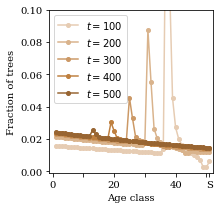

In [9]:
# Plot alternative forest structure figure.
fig, ax = plt.subplots(1,1,figsize=(3,3))

ax.set_box_aspect(1)
tplot = [100,200,300,400,500]
cplot = ['#e6ccb3','#d9b38c','#cc9966','#bf8040',c3]
for t in tplot:
    ax.plot(np.arange(N+1)+1,sim[t,:-1],'o-',c=cplot[int(t/100)-1],markersize=4,alpha=1,
            label=r'$t={:.0f}$'.format(t))
    
ax.set_xlabel('Age class')
ax.set_xticks([0,10,20,30,40,50,51],labels=[0,'',20,'',40,'','S'])
ax.set_xlim(-1,52)
ax.set_ylabel('Fraction of trees')
ax.set_ylim(-0.001,0.1001)
ax.legend()
#ax.set_ylim(-0.0015,0.0515)

# Save
fig.savefig('figures/simulation_j0_agestructurealt.pdf',bbox_inches='tight')

# 3. Vary amount and length of invading beetles

In [10]:
# Amount of invading beetles
bi_arr = np.linspace(0,200,num=9)
# Length of beetle invasion
bi_len = np.linspace(50,400,num=15)
# Set number of steps
nsteps_i = 500

In [11]:
# Function to get the segments where the beetle population persists
# Use this to make an outline where the beetles persist: 
# https://stackoverflow.com/questions/24539296/outline-a-region-in-a-graph
def get_segments(persist):
    # Input the binary array where the beetles persist or not 
    # and turn it into an outline by returning the correct line segments
    
    # a vertical line segment is needed, when the pixels next to each other horizontally
    #   belong to different groups (one is part of the mask, the other isn't)
    # after this ver_seg has two arrays, one for row coordinates, the other for column coordinates 
    ver_seg = np.where(persist[:,1:] != persist[:,:-1])

    # the same is repeated for horizontal segments
    hor_seg = np.where(persist[1:,:] != persist[:-1,:])

    # if we have a horizontal segment at 7,2, it means that it must be drawn between pixels
    #   (2,7) and (2,8), i.e. from (2,8)..(3,8)
    # in order to draw a discountinuous line, we add Nones in between segments
    l = []
    for px in zip(*hor_seg):
        l.append((px[1], px[0]+1))
        l.append((px[1]+1, px[0]+1))
        l.append((np.nan,np.nan))

    # and the same for vertical segments
    for px in zip(*ver_seg):
        l.append((px[1]+1, px[0]))
        l.append((px[1]+1, px[0]+1))
        l.append((np.nan, np.nan))

    # now we transform the list into a numpy array of Nx2 shape
    segments = np.array(l)
    return segments

### $\Phi = 200$

In [12]:
### SIMULATION 

# Set up return array
sim_i = np.zeros((len(bi_arr),len(bi_len),nsteps_i+1,N+2))

# Set up initial conditions
sim_i[:,:,0,0] = 1 # All trees are juvenile to start

# Step forward
for j,bb in enumerate(bi_arr):
    for k,ll in enumerate(bi_len):
        for i in np.arange(nsteps_i):
            if i<ll:
                sim_i[j,k,i+1] = af.timestep(sim_i[j,k,i],s,N,n,p,b_imm=bb,c=c)
            else:
                sim_i[j,k,i+1] = af.timestep(sim_i[j,k,i],s,N,n,p,b_imm=0,c=c)

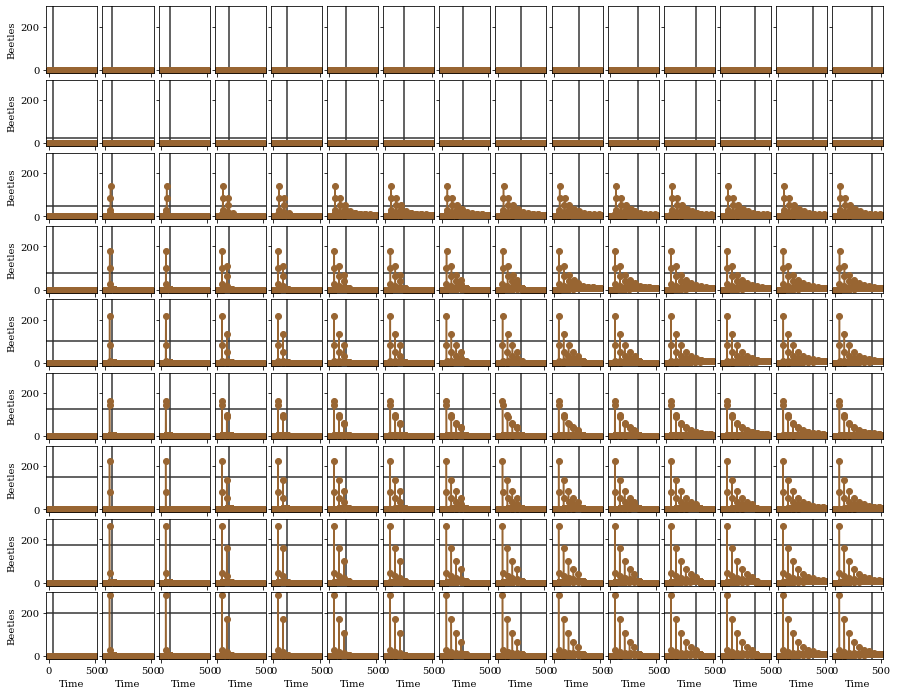

In [13]:
# Plot all of them to get an intuition for what this looks like
fig,axs = plt.subplots(len(bi_arr),len(bi_len),figsize=(15,12),
                       sharey=True,sharex=True,gridspec_kw={'wspace':0.1,'hspace':0.1})
#layout='tight',wspace=0,hspace=0)
for i,ax_x in enumerate(axs):
    for j,ax in enumerate(ax_x):
        ax.plot(sim_i[i,j,:,N+1],'o-',c=c3)
        ax.axvline(bi_len[j],zorder=-10,c=cg)
        ax.axhline(bi_arr[i],zorder=-10,c=cg)
        if i==len(bi_arr)-1:
            ax.set_xlabel('Time')
        if j==0:
            ax.set_ylabel('Beetles')

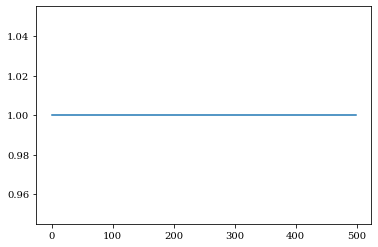

In [14]:
# Get total trees for one case just to show that this works even with beetle immigration.
plt.plot(sim_i[7,10,1:,:(N+1)].sum(axis=1)+sim_i[7,10,1:,N+1]/c+sim_i[7,10,:-1,N+1]/c)

In [15]:
# Analyze without plotting:
beetle_outbreak = np.zeros((len(bi_arr),len(bi_len)))
beetle_persist = np.zeros((len(bi_arr),len(bi_len)))
for j,bb in enumerate(bi_arr):
    for k,ll in enumerate(bi_len):
        beetle_outbreak[j,k] += np.max(sim_i[j,k,:,N+1])
        beetle_persist[j,k] += (sim_i[j,k,-1,N+1]>0)

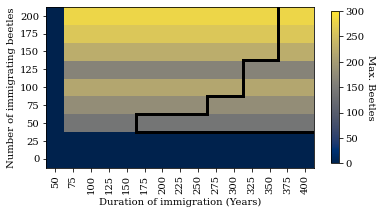

In [16]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
# Plot maximum outbreak
col = ax.imshow(beetle_outbreak,origin='lower',cmap='cividis',vmin=0,vmax=300)
# Add colorbar
cbar = fig.colorbar(col,ax=ax,shrink=0.7)
cbar.set_label('Max. Beetles',rotation=270,labelpad=10)

# Get line segments
segs = get_segments(beetle_persist)
ax.plot(segs[:,0]-0.5, segs[:,1]-0.5, color=(0,0,0,1), linewidth=3)

### Now for axes labels
ax.set_ylabel('Number of immigrating beetles')
ax.set_xlabel('Duration of immigration (Years)')

ax.set_xticks(np.arange(len(bi_len)),bi_len.astype(int),rotation=90)
ax.set_yticks(np.arange(len(bi_arr)),bi_arr.astype(int),rotation=0)

fig.savefig('figures/beetle_immigration.pdf',bbox_inches='tight')

### $\Phi=150$

In [22]:
### SIMULATION for different threshold
p1 = 150
# Set up return array
sim_ip1 = np.zeros((len(bi_arr),len(bi_len),nsteps_i+1,N+2))

# Set up initial conditions
sim_ip1[:,:,0,0] = 1 # All trees are juvenile to start

# Step forward
for j,bb in enumerate(bi_arr):
    for k,ll in enumerate(bi_len):
        for i in np.arange(nsteps_i):
            if i<ll:
                sim_ip1[j,k,i+1] = af.timestep(sim_ip1[j,k,i],s,N,n,p1,b_imm=bb,c=c)
            else:
                sim_ip1[j,k,i+1] = af.timestep(sim_ip1[j,k,i],s,N,n,p1,b_imm=0,c=c)

In [23]:
# Analyze without plotting:
beetle_outbreak_p1 = np.zeros((len(bi_arr),len(bi_len)))
beetle_persist_p1 = np.zeros((len(bi_arr),len(bi_len)))
for j,bb in enumerate(bi_arr):
    for k,ll in enumerate(bi_len):
        beetle_outbreak_p1[j,k] += np.max(sim_ip1[j,k,:,N+1])
        beetle_persist_p1[j,k] += (sim_ip1[j,k,-1,N+1]>0)

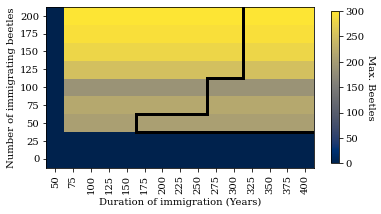

In [24]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
# Plot maximum outbreak
col = ax.imshow(beetle_outbreak_p1,origin='lower',cmap='cividis',vmin=0,vmax=300)
# Add colorbar
cbar = fig.colorbar(col,ax=ax,shrink=0.7)
cbar.set_label('Max. Beetles',rotation=270,labelpad=10)

# Get line segments
segs_p1 = get_segments(beetle_persist_p1)
ax.plot(segs_p1[:,0]-0.5, segs_p1[:,1]-0.5, color=(0,0,0,1), linewidth=3)

### Now for axes labels
ax.set_ylabel('Number of immigrating beetles')
ax.set_xlabel('Duration of immigration (Years)')

ax.set_xticks(np.arange(len(bi_len)),bi_len.astype(int),rotation=90)
ax.set_yticks(np.arange(len(bi_arr)),bi_arr.astype(int),rotation=0)

fig.savefig('figures/beetle_immigration_p150.pdf',bbox_inches='tight')

### $\Phi=250$

In [25]:
# One final value of gamma, and figure of all three
p2 = 250
# Set up return array
sim_ip2 = np.zeros((len(bi_arr),len(bi_len),nsteps_i+1,N+2))

# Set up initial conditions
sim_ip2[:,:,0,0] = 1 # All trees are juvenile to start

# Step forward
for j,bb in enumerate(bi_arr):
    for k,ll in enumerate(bi_len):
        for i in np.arange(nsteps_i):
            if i<ll:
                sim_ip2[j,k,i+1] = af.timestep(sim_ip2[j,k,i],s,N,n,p2,b_imm=bb,c=c)
            else:
                sim_ip2[j,k,i+1] = af.timestep(sim_ip2[j,k,i],s,N,n,p2,b_imm=0,c=c)

In [26]:
# Analyze without plotting:
beetle_outbreak_p2 = np.zeros((len(bi_arr),len(bi_len)))
beetle_persist_p2 = np.zeros((len(bi_arr),len(bi_len)))
for j,bb in enumerate(bi_arr):
    for k,ll in enumerate(bi_len):
        beetle_outbreak_p2[j,k] += np.max(sim_ip2[j,k,:,N+1])
        beetle_persist_p2[j,k] += (sim_ip2[j,k,-1,N+1]>0)

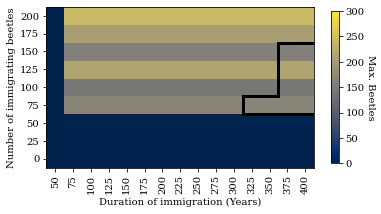

In [27]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
# Plot maximum outbreak
col = ax.imshow(beetle_outbreak_p2,origin='lower',cmap='cividis',vmin=0,vmax=300)
# Add colorbar
cbar = fig.colorbar(col,ax=ax,shrink=0.7)
cbar.set_label('Max. Beetles',rotation=270,labelpad=10)

# Get line segments
segs_p2 = get_segments(beetle_persist_p2)
ax.plot(segs_p2[:,0]-0.5, segs_p2[:,1]-0.5, color=(0,0,0,1), linewidth=3)

### Now for axes labels
ax.set_ylabel('Number of immigrating beetles')
ax.set_xlabel('Duration of immigration (Years)')

ax.set_xticks(np.arange(len(bi_len)),bi_len.astype(int),rotation=90)
ax.set_yticks(np.arange(len(bi_arr)),bi_arr.astype(int),rotation=0)

fig.savefig('figures/beetle_immigration_p250.pdf',bbox_inches='tight')

### All together

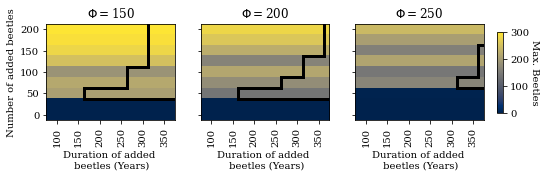

In [29]:
fig,axs = plt.subplots(1,3,figsize=(9,2.8),sharey=True)
# Plot maximum outbreak
axs[0].imshow(beetle_outbreak_p1,origin='lower',cmap='cividis',vmin=0,vmax=300)
axs[1].imshow(beetle_outbreak,origin='lower',cmap='cividis',vmin=0,vmax=300)
col = axs[2].imshow(beetle_outbreak_p2,origin='lower',cmap='cividis',vmin=0,vmax=300)
# Add colorbar
fig.subplots_adjust(right=0.8)
cbar = fig.add_axes([0.82, 0.3, 0.01, 0.4])
fig.colorbar(col, cax=cbar)
#cbar = fig.colorbar(col,ax=axs[2],shrink=0.7)
cbar.set_ylabel('Max. Beetles',rotation=270,labelpad=10)

# Segments
axs[0].plot(segs_p1[:,0]-0.5, segs_p1[:,1]-0.5, color=(0,0,0,1), linewidth=3)
axs[1].plot(segs[:,0]-0.5, segs[:,1]-0.5, color=(0,0,0,1), linewidth=3)
axs[2].plot(segs_p2[:,0]-0.5, segs_p2[:,1]-0.5, color=(0,0,0,1), linewidth=3)

### Now for axes labels
axs[0].set_yticks(np.arange(len(bi_arr))[::2],bi_arr.astype(int)[::2],rotation=0)
axs[0].set_ylabel('Number of added beetles')
for ax,pp in zip(axs,[p1,p,p2]):
    ax.set_box_aspect(0.75) 
    ax.set_xlabel('Duration of added \n beetles (Years)')
    ax.set_xticks(np.arange(len(bi_len))[::2],bi_len.astype(int)[::2],rotation=90)
    ax.set_title(r'$\Phi=${:.0f}'.format(pp))
    
fig.savefig('figures/beetle_immigration_p.pdf',bbox_inches='tight')

In [30]:
# What is the maximum number of beetles compared to the equilibrium?
for bmax,pp in zip([beetle_outbreak_p1,beetle_outbreak,beetle_outbreak_p2],[p1,p,p2]):
    meqtemp = opt.root_scalar(lambda x: x/c - 1 + af.fhill(x,n,pp),bracket=[ms,c]).root
    beqtemp = c*meqtemp*(1-s)*s**N/(c*(1-s)*s**N+meqtemp-meqtemp*s**N+2*meqtemp*(1-s)*s**N)
    print(np.max(bmax),beqtemp)
    print(np.max(bmax)/beqtemp)
    print()

296.79403241522476 7.321709919204829
40.53616377736226

279.8211466319798 7.320815290295883
38.222675417435696

242.51248688411584 7.317946458654957
33.13941803950965

